# MVP Comunidad Valenciana

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime as dt
from tools import dataoveriew, plot_roc_curve, plot_confusion_matrix
from datetime import datetime
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = None

# Using Activo and Baja for 0 and 1    
class_names = ['Activo','Baja']

%matplotlib inline

In [2]:
data = pd.read_excel('../data/portfolio_com_valencia.xlsx')
data.head()

,Start Date,Cliente,Client Type,Modelo,Provincia,Gender,Nationality,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Status Date,Status,Property Type,Financiado,Rango Precio,Resumen Precio,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias
0,2015-01-02,17,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,2017-09-15,1,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-03,58,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,2017-12-31,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,0
2,2015-01-05,91,Normal,V1,Valencia,HOMBRE,ES - ESPAÑOLA,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,2018-02-28,1,"Chalet, villa",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
3,2015-01-05,111,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,2015-01-07,0,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0
4,2015-01-05,118,Normal,V1,Alicante,MUJER,ES - ESPAÑOLA,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,2018-03-15,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,53


In [3]:
data.shape

(55227, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55227 entries, 0 to 55226
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Start Date          55227 non-null  datetime64[ns]
 1   Cliente             55227 non-null  int64         
 2   Client Type         55227 non-null  object        
 3   Modelo              55227 non-null  object        
 4   Provincia           55227 non-null  object        
 5   Gender              55227 non-null  object        
 6   Nationality         55227 non-null  object        
 7   Born Date           55001 non-null  datetime64[ns]
 8   Housing Type        55227 non-null  object        
 9   Labor Situation     55227 non-null  object        
 10  Marital Status      55227 non-null  object        
 11  Income Amount       55227 non-null  int64         
 12  Number Pay          55227 non-null  int64         
 13  Status Date         55227 non-null  datetime64

In [5]:
data.isnull().sum()

Start Date              0
Cliente                 0
Client Type             0
Modelo                  0
Provincia               0
Gender                  0
Nationality             0
Born Date             226
Housing Type            0
Labor Situation         0
Marital Status          0
Income Amount           0
Number Pay              0
Status Date             0
Status                  0
Property Type           0
Financiado              0
Rango Precio            0
Resumen Precio          0
Precio Contado          0
Precio Total            0
Precio Mensualidad      0
Quejas                  0
Incidencias             0
dtype: int64

In [6]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 55227

Número de Columnas: 24

Columnas:

['Start Date', 'Cliente', 'Client Type', 'Modelo', 'Provincia', 'Gender', 'Nationality', 'Born Date', 'Housing Type', 'Labor Situation', 'Marital Status', 'Income Amount', 'Number Pay', 'Status Date', 'Status', 'Property Type', 'Financiado', 'Rango Precio', 'Resumen Precio', 'Precio Contado', 'Precio Total', 'Precio Mensualidad', 'Quejas', 'Incidencias']

Valores nulos: 226

Valores únicos:

Start Date             2124
Cliente               55227
Client Type               2
Modelo                    2
Provincia                 3
Gender                    2
Nationality              10
Born Date             19920
Housing Type              5
Labor Situation           8
Marital Status            5
Income Amount           470
Number Pay                5
Status Date            2014
Status                    2
Property Type             7
Financiado                3
Rango Precio              6
Resumen Precio   

In [7]:
data['Cliente'] = data['Cliente'].astype('str')
data.describe()

,Income Amount,Number Pay,Status,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias
count,5.522700e+04,55227.000000,55227.000000,55227.00000,55227.000000,55227.000000,55227.000000,55227.000000
mean,3.987213e+04,12.904123,0.258750,100.27128,473.676426,9.942365,0.346823,5.317073
std,5.108236e+06,1.062367,0.437952,99.78776,110.439360,1.528478,1.000461,18.318433
min,1.000000e+00,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+03,12.000000,0.000000,49.00000,409.000000,10.000000,0.000000,0.000000
50%,1.500000e+03,12.000000,0.000000,79.00000,459.000000,10.000000,0.000000,0.000000
75%,2.000000e+03,14.000000,1.000000,149.00000,559.000000,10.000000,0.000000,1.000000
max,1.000000e+09,16.000000,1.000000,999.00000,4529.000000,99.000000,28.000000,272.000000


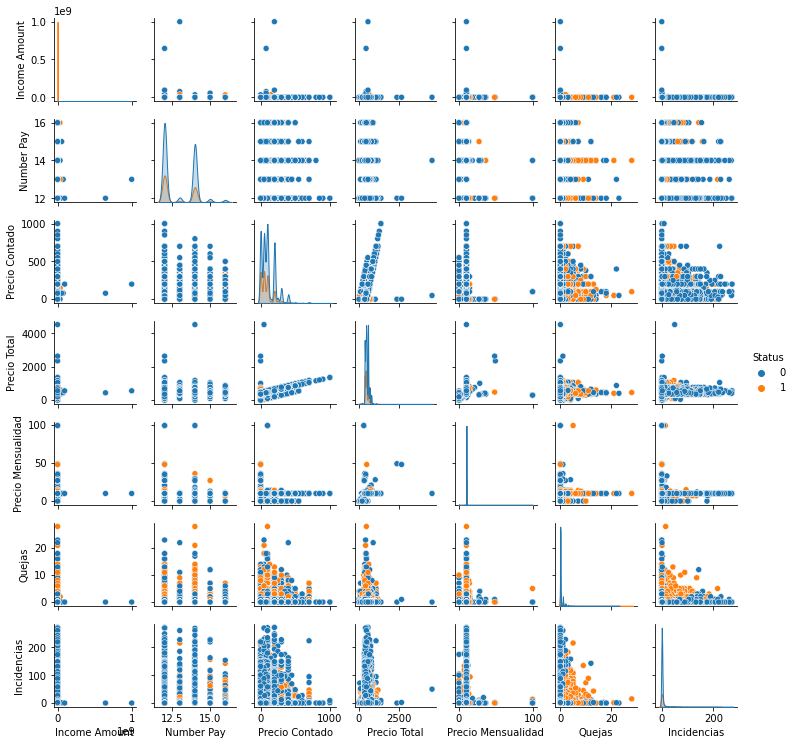

In [9]:
# Don´t do this!!!!

# sns.pairplot(data = data, diag_kind = 'kde', hue = 'Status', height = 1.5);

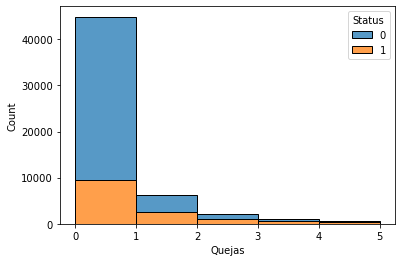

In [8]:
sns.histplot(data = data, x="Quejas", hue = 'Status', multiple="stack",
             binwidth=1,  binrange = (0,5));

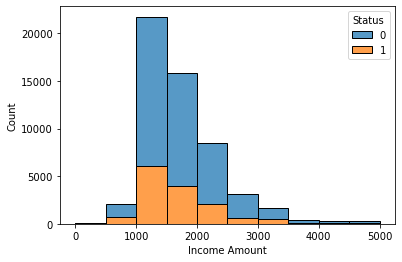

In [9]:
sns.histplot(data = data, x="Income Amount", hue = 'Status', multiple="stack", binrange = (0,5000), bins = 10);

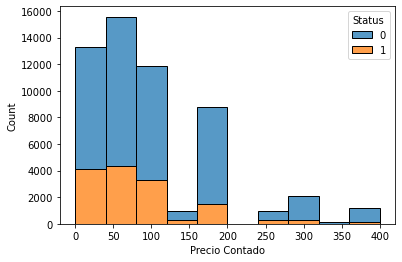

In [10]:
sns.histplot(data = data, x="Precio Contado", hue = 'Status', multiple="stack", binrange = (0,400), bins = 10);

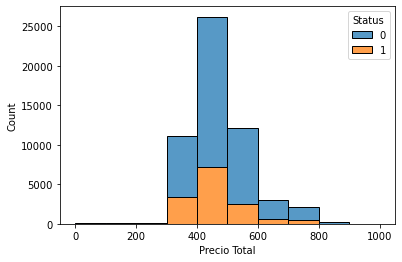

In [11]:
sns.histplot(data = data, x="Precio Total", hue = 'Status', multiple="stack", binrange = (0,1000), bins = 10);

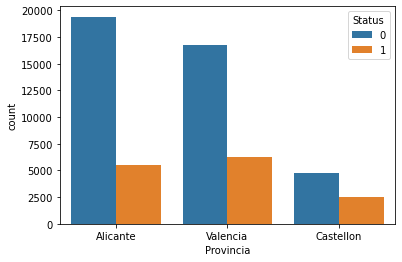

In [12]:
sns.countplot(x="Provincia", hue = 'Status',data = data);

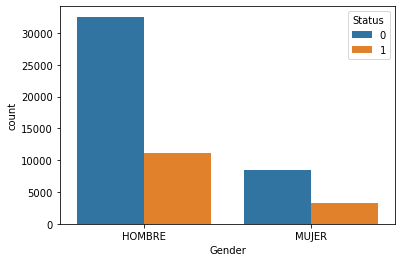

In [13]:
sns.countplot(x="Gender", hue = 'Status',data = data);

In [14]:
corr = data.corr()
corr

,Income Amount,Number Pay,Status,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias
Income Amount,1.000000,-0.000861,-0.003719,0.003112,0.002119,0.000272,-0.002292,-0.001875
Number Pay,-0.000861,1.000000,-0.066080,0.015622,-0.006897,-0.000849,-0.014525,-0.024098
Status,-0.003719,-0.066080,1.000000,-0.114806,-0.082387,0.000503,0.191462,0.173987
Precio Contado,0.003112,0.015622,-0.114806,1.000000,0.855998,-0.078775,-0.033220,-0.012790
Precio Total,0.002119,-0.006897,-0.082387,0.855998,1.000000,0.108481,-0.048699,-0.004180
Precio Mensualidad,0.000272,-0.000849,0.000503,-0.078775,0.108481,1.000000,-0.011866,-0.003895
Quejas,-0.002292,-0.014525,0.191462,-0.033220,-0.048699,-0.011866,1.000000,0.029495
Incidencias,-0.001875,-0.024098,0.173987,-0.012790,-0.004180,-0.003895,0.029495,1.000000


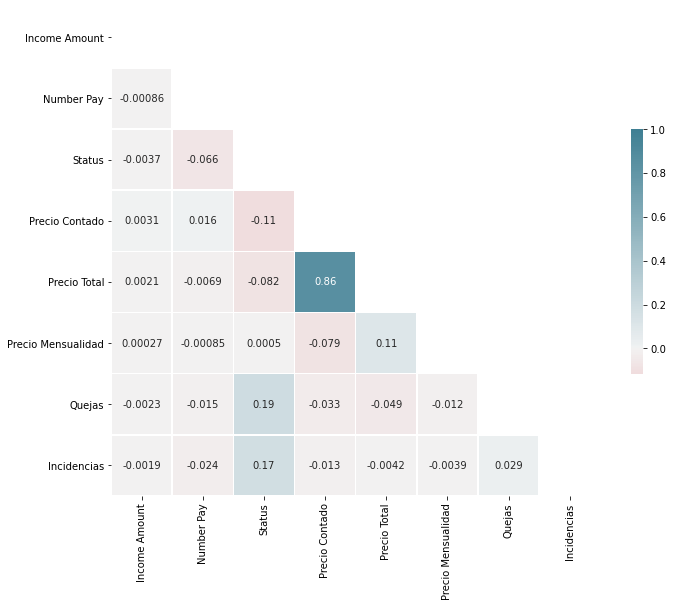

In [15]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [18]:
data.head()

,Start Date,Cliente,Client Type,Modelo,Provincia,Gender,Nationality,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Status Date,Status,Property Type,Financiado,Rango Precio,Resumen Precio,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias
0,2015-01-02,17,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,2017-09-15,1,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-03,58,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,2017-12-31,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,0
2,2015-01-05,91,Normal,V1,Valencia,HOMBRE,ES - ESPAÑOLA,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,2018-02-28,1,"Chalet, villa",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
3,2015-01-05,111,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,2015-01-07,0,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0
4,2015-01-05,118,Normal,V1,Alicante,MUJER,ES - ESPAÑOLA,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,2018-03-15,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,53


## Benchmarks (Baseline)

- Naive Models
- Modelo sin variables categóricas

### Naive Models:

Modelo en el que una Queja implica la Baja

In [18]:
data_filtered = data[['Quejas', 'Status']]
data_filtered.head()

,Quejas,Status
0,1,1
1,0,1
2,1,1
3,1,0
4,0,1


In [19]:
y_pred = data_filtered['Quejas'].apply(lambda x: 1 if x > 0 else 0)
y_test = data_filtered['Status']

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     40937
           1       0.46      0.33      0.39     14290

    accuracy                           0.73     55227
   macro avg       0.62      0.60      0.61     55227
weighted avg       0.70      0.73      0.71     55227



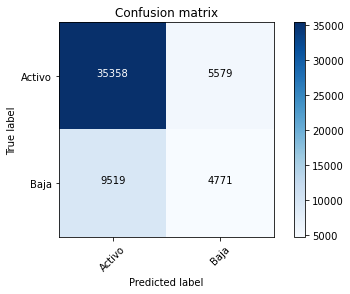

In [20]:
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Modelo en el que una Queja o un Incidencia implica la Baja

In [22]:
data_filtered = data[['Quejas', 'Incidencias', 'Status']]
data_filtered.head()

,Quejas,Incidencias,Status
0,1,0,1
1,0,0,1
2,1,0,1
3,1,0,0
4,0,53,1


In [23]:
y_pred = data_filtered['Quejas'] + data_filtered['Incidencias']
y_pred = y_pred.apply(lambda x: 1 if x > 0 else 0)
y_test = data_filtered['Status']

              precision    recall  f1-score   support

           0       0.82      0.67      0.74     40937
           1       0.38      0.57      0.46     14290

    accuracy                           0.65     55227
   macro avg       0.60      0.62      0.60     55227
weighted avg       0.70      0.65      0.66     55227



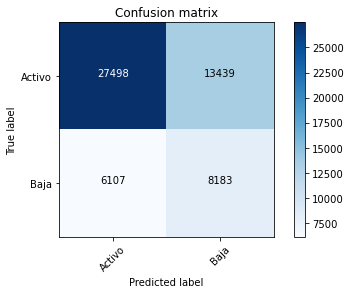

In [24]:
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

### Sin variables categóricas:

In [21]:
data_filtered = data[['Quejas', 'Incidencias', 'Status']]
data_filtered.head()

,Quejas,Incidencias,Status
0,1,0,1
1,0,0,1
2,1,0,1
3,1,0,0
4,0,53,1


In [22]:
X = data_filtered.iloc[:, :-1]
y = data_filtered.iloc[:, 2]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

#### Regresión Logística

In [24]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [25]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      8188
           1       0.49      0.49      0.49      2858

    accuracy                           0.73     11046
   macro avg       0.65      0.65      0.65     11046
weighted avg       0.73      0.73      0.73     11046



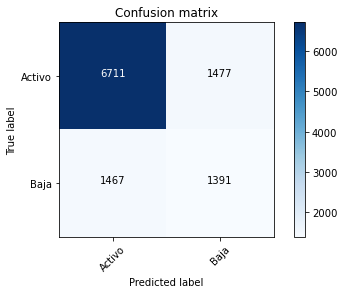

In [26]:
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.66


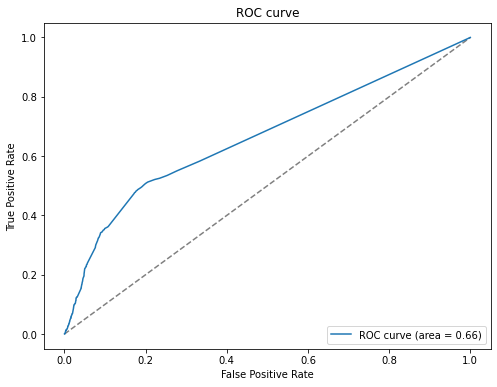

In [27]:
plot_roc_curve(classifier, X_test, y_test)

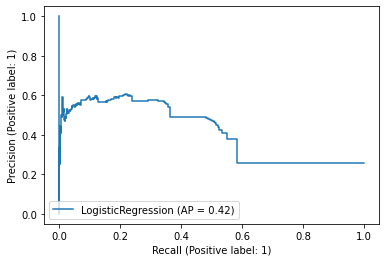

In [28]:
plot_precision_recall_curve(classifier, X_test, y_test)

## Feature engineering

- Edad en Años
- Rango de Income Amount
- Días Activo escalado
- Escalado de 'Quejas' y 'MT

Rangos de Edad:

In [29]:
data.columns

Index(['Start Date', 'Cliente', 'Client Type', 'Modelo', 'Provincia', 'Gender',
       'Nationality', 'Born Date', 'Housing Type', 'Labor Situation',
       'Marital Status', 'Income Amount', 'Number Pay', 'Status Date',
       'Status', 'Property Type', 'Financiado', 'Rango Precio',
       'Resumen Precio', 'Precio Contado', 'Precio Total',
       'Precio Mensualidad', 'Quejas', 'Incidencias'],
      dtype='object')

In [30]:
data['Born Date'].isnull().sum()

226

In [31]:
data['Born Date'] = data['Born Date'].replace(np.nan, datetime(1970, 1, 1))

data.head()

,Start Date,Cliente,Client Type,Modelo,Provincia,Gender,Nationality,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Status Date,Status,Property Type,Financiado,Rango Precio,Resumen Precio,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias
0,2015-01-02,17,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,2017-09-15,1,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-03,58,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,2017-12-31,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,0
2,2015-01-05,91,Normal,V1,Valencia,HOMBRE,ES - ESPAÑOLA,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,2018-02-28,1,"Chalet, villa",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
3,2015-01-05,111,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,2015-01-07,0,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0
4,2015-01-05,118,Normal,V1,Alicante,MUJER,ES - ESPAÑOLA,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,2018-03-15,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,53


In [32]:
data['Born Date'].isnull().sum()

0

In [33]:
# Edad actual si OP y edad cuando se dio de baja si BAJA

data['Edad'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Born Date'])):
    if data.loc[i, 'Status'] == 0:
        data.loc[i,'Edad'] = ((fecha - data.loc[i,'Born Date']).days)/365
    else:
        data.loc[i,'Edad'] = ((data.loc[i,'Status Date'] - data.loc[i,'Born Date']).days)/365
                        
data.head()

,Start Date,Cliente,Client Type,Modelo,Provincia,Gender,Nationality,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Status Date,Status,Property Type,Financiado,Rango Precio,Resumen Precio,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias,Edad
0,2015-01-02,17,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,2017-09-15,1,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164
1,2015-01-03,58,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,2017-12-31,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712
2,2015-01-05,91,Normal,V1,Valencia,HOMBRE,ES - ESPAÑOLA,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,2018-02-28,1,"Chalet, villa",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562
3,2015-01-05,111,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,2015-01-07,0,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521
4,2015-01-05,118,Normal,V1,Alicante,MUJER,ES - ESPAÑOLA,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,2018-03-15,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096


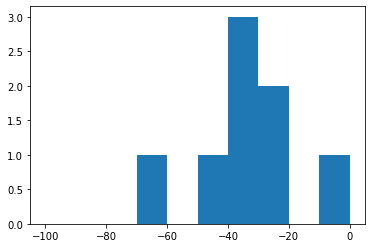

In [34]:
plt.hist(data['Edad'], range = (-100,0));

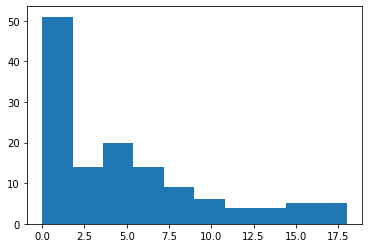

In [35]:
plt.hist(data['Edad'], range = (0,18));

In [36]:
data['Edad'].mean()

52.30124380793465

In [37]:
for i in range(len(data['Edad'])):
    if data.loc[i, 'Edad'] < 18:
        data.loc[i, 'Edad'] = data['Edad'].mean()
    else:
        continue

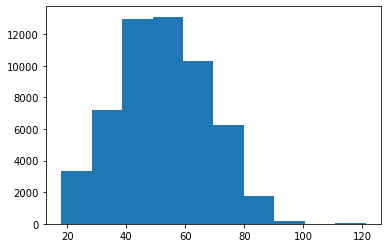

In [38]:
plt.hist(data['Edad']);

In [39]:
# Mapping Edad 
data.loc[data['Edad'] <= 30, 'Rango_Edad'] = "18-30"
data.loc[(data['Edad'] > 30) & (data['Edad'] <= 40), 'Rango_Edad'] = "30-40"
data.loc[(data['Edad'] > 40) & (data['Edad'] <= 50), 'Rango_Edad'] = "40-50"
data.loc[(data['Edad'] > 50) & (data['Edad'] <= 60), 'Rango_Edad'] = "50-60"
data.loc[(data['Edad'] > 60) & (data['Edad'] <= 70), 'Rango_Edad'] = "60-70"
data.loc[(data['Edad'] > 70) & (data['Edad'] <= 80), 'Rango_Edad'] = "70-80"
data.loc[data['Edad'] > 80, 'Rango_Edad'] = "+80"
data.head()

,Start Date,Cliente,Client Type,Modelo,Provincia,Gender,Nationality,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Status Date,Status,Property Type,Financiado,Rango Precio,Resumen Precio,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias,Edad,Rango_Edad
0,2015-01-02,17,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,2017-09-15,1,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50
1,2015-01-03,58,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,2017-12-31,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50
2,2015-01-05,91,Normal,V1,Valencia,HOMBRE,ES - ESPAÑOLA,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,2018-02-28,1,"Chalet, villa",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40
3,2015-01-05,111,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,2015-01-07,0,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50
4,2015-01-05,118,Normal,V1,Alicante,MUJER,ES - ESPAÑOLA,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,2018-03-15,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30


In [40]:
tab1 = pd.crosstab(data["Rango_Edad"], data["Status"], margins = True)
tab2 = pd.crosstab(data["Rango_Edad"], data["Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Status,0,1,All,0,1
Rango_Edad,,,,,
+80,1602,319,1921,0.833941,0.166059
18-30,2516,1582,4098,0.613958,0.386042
30-40,4622,3306,7928,0.582997,0.417003
40-50,8795,4081,12876,0.683054,0.316946
50-60,9820,2748,12568,0.781349,0.218651
60-70,8380,1489,9869,0.849124,0.150876
70-80,5202,765,5967,0.871795,0.128205
All,40937,14290,55227,0.741250,0.258750


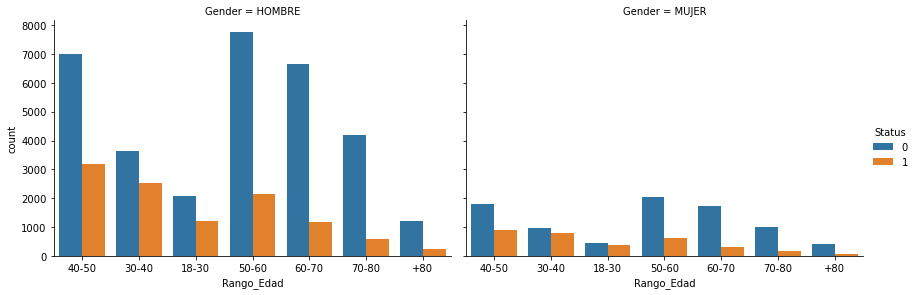

In [41]:
g = sns.catplot(x="Rango_Edad", col="Gender",
                data=data, kind="count", hue = "Status",
                height=4, aspect=1.5);

Rangos de Income Amount:

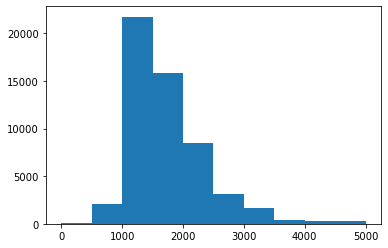

In [42]:
plt.hist(data['Income Amount'], range=(0, 5000));

In [43]:
# Mapping Income Amount
data.loc[data['Income Amount'] <= 1000, 'Income'] = "0-1000"
data.loc[(data['Income Amount'] > 1000) & (data['Income Amount'] <= 1500), 'Income'] = "1000-1500"
data.loc[(data['Income Amount'] > 1500) & (data['Income Amount'] <= 2000), 'Income'] = "1500-2000"
data.loc[(data['Income Amount'] > 2000) & (data['Income Amount'] <= 3000), 'Income'] = "2000-3000"
data.loc[data['Income Amount'] > 3000, 'Income'] = "+3000"
data.head()

,Start Date,Cliente,Client Type,Modelo,Provincia,Gender,Nationality,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Status Date,Status,Property Type,Financiado,Rango Precio,Resumen Precio,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias,Edad,Rango_Edad,Income
0,2015-01-02,17,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,2017-09-15,1,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000
1,2015-01-03,58,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,2017-12-31,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50,1000-1500
2,2015-01-05,91,Normal,V1,Valencia,HOMBRE,ES - ESPAÑOLA,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,2018-02-28,1,"Chalet, villa",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000
3,2015-01-05,111,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,2015-01-07,0,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500
4,2015-01-05,118,Normal,V1,Alicante,MUJER,ES - ESPAÑOLA,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,2018-03-15,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30,0-1000


In [44]:
tab1 = pd.crosstab(data["Income"], data["Status"], margins = True)
tab2 = pd.crosstab(data["Income"], data["Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Status,0,1,All,0,1
Income,,,,,
+3000,1687,448,2135,0.790164,0.209836
0-1000,6979,3147,10126,0.689216,0.310784
1000-1500,18436,6408,24844,0.742071,0.257929
1500-2000,9482,3084,12566,0.754576,0.245424
2000-3000,4353,1203,5556,0.783477,0.216523
All,40937,14290,55227,0.741250,0.258750


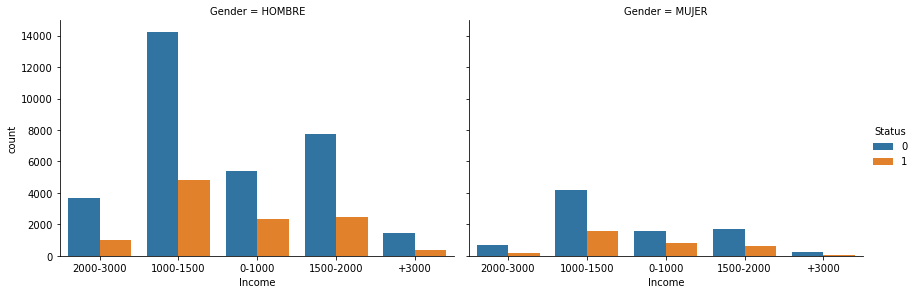

In [45]:
g = sns.catplot(x="Income", col="Gender",
                data=data, kind="count", hue = "Status",
                height=4, aspect=1.5);

Días Activo:

In [46]:
# Días hasta el 19/01/2021 si ACTIVO y hasta cuando se dio de baja si BAJA

data['Dias_Activo'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Start Date'])):
    if data.loc[i, 'Status'] == 0:
        data.loc[i,'Dias_Activo'] = (fecha - data.loc[i,'Start Date']).days
    else:
        data.loc[i,'Dias_Activo'] = (data.loc[i,'Status Date'] - data.loc[i,'Start Date']).days
                        
data.head()

,Start Date,Cliente,Client Type,Modelo,Provincia,Gender,Nationality,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Status Date,Status,Property Type,Financiado,Rango Precio,Resumen Precio,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias,Edad,Rango_Edad,Income,Dias_Activo
0,2015-01-02,17,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,2017-09-15,1,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987
1,2015-01-03,58,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,2017-12-31,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50,1000-1500,1093
2,2015-01-05,91,Normal,V1,Valencia,HOMBRE,ES - ESPAÑOLA,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,2018-02-28,1,"Chalet, villa",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150
3,2015-01-05,111,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,2015-01-07,0,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206
4,2015-01-05,118,Normal,V1,Alicante,MUJER,ES - ESPAÑOLA,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,2018-03-15,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30,0-1000,1165


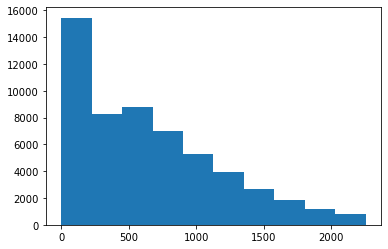

In [47]:
plt.hist(data['Dias_Activo']);

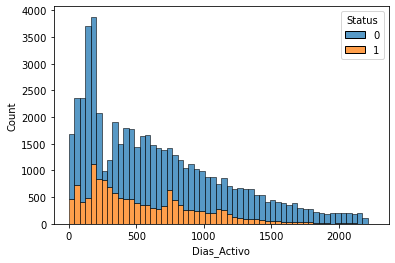

In [48]:
sns.histplot(data = data, x = 'Dias_Activo', hue = 'Status', multiple = 'stack')

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Dias_Activo_sca'] = scaler.fit_transform(data['Dias_Activo'].values.reshape(-1, 1))
data.head()

,Start Date,Cliente,Client Type,Modelo,Provincia,Gender,Nationality,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Status Date,Status,Property Type,Financiado,Rango Precio,Resumen Precio,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_sca
0,2015-01-02,17,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,2017-09-15,1,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987,0.437694
1,2015-01-03,58,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,2017-12-31,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50,1000-1500,1093,0.484701
2,2015-01-05,91,Normal,V1,Valencia,HOMBRE,ES - ESPAÑOLA,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,2018-02-28,1,"Chalet, villa",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150,0.509978
3,2015-01-05,111,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,2015-01-07,0,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206,0.978271
4,2015-01-05,118,Normal,V1,Alicante,MUJER,ES - ESPAÑOLA,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,2018-03-15,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30,0-1000,1165,0.516630


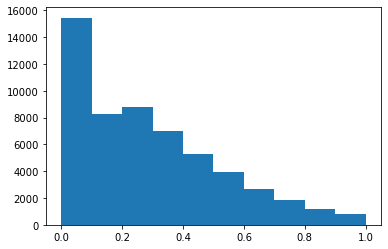

In [50]:
plt.hist(data['Dias_Activo_sca']);

Escalado de Quejas y Missing Test (MT):

In [51]:
scaler = MinMaxScaler()
data['Quejas_sca'] = scaler.fit_transform(data['Quejas'].values.reshape(-1, 1))
data.head()

,Start Date,Cliente,Client Type,Modelo,Provincia,Gender,Nationality,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Status Date,Status,Property Type,Financiado,Rango Precio,Resumen Precio,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_sca,Quejas_sca
0,2015-01-02,17,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,2017-09-15,1,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987,0.437694,0.035714
1,2015-01-03,58,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,2017-12-31,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50,1000-1500,1093,0.484701,0.000000
2,2015-01-05,91,Normal,V1,Valencia,HOMBRE,ES - ESPAÑOLA,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,2018-02-28,1,"Chalet, villa",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150,0.509978,0.035714
3,2015-01-05,111,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,2015-01-07,0,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206,0.978271,0.035714
4,2015-01-05,118,Normal,V1,Alicante,MUJER,ES - ESPAÑOLA,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,2018-03-15,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30,0-1000,1165,0.516630,0.000000


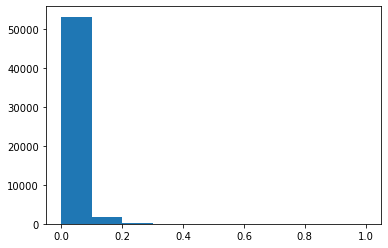

In [52]:
plt.hist(data['Quejas_sca']);

In [53]:
scaler = MinMaxScaler()
data['Incidencias_sca'] = scaler.fit_transform(data['Incidencias'].values.reshape(-1, 1))
data.head()

,Start Date,Cliente,Client Type,Modelo,Provincia,Gender,Nationality,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Status Date,Status,Property Type,Financiado,Rango Precio,Resumen Precio,Precio Contado,Precio Total,Precio Mensualidad,Quejas,Incidencias,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_sca,Quejas_sca,Incidencias_sca
0,2015-01-02,17,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,2017-09-15,1,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987,0.437694,0.035714,0.000000
1,2015-01-03,58,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,2017-12-31,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50,1000-1500,1093,0.484701,0.000000,0.000000
2,2015-01-05,91,Normal,V1,Valencia,HOMBRE,ES - ESPAÑOLA,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,2018-02-28,1,"Chalet, villa",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150,0.509978,0.035714,0.000000
3,2015-01-05,111,Normal,V1,Alicante,HOMBRE,ES - ESPAÑOLA,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,2015-01-07,0,"Chalet, villa",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206,0.978271,0.035714,0.000000
4,2015-01-05,118,Normal,V1,Alicante,MUJER,ES - ESPAÑOLA,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,2018-03-15,1,Apartamento,Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30,0-1000,1165,0.516630,0.000000,0.194853


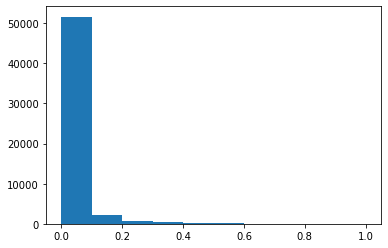

In [54]:
plt.hist(data['Incidencias_sca']);

## Enconding con ``get_dummies``

In [55]:
data.columns

Index(['Start Date', 'Cliente', 'Client Type', 'Modelo', 'Provincia', 'Gender',
       'Nationality', 'Born Date', 'Housing Type', 'Labor Situation',
       'Marital Status', 'Income Amount', 'Number Pay', 'Status Date',
       'Status', 'Property Type', 'Financiado', 'Rango Precio',
       'Resumen Precio', 'Precio Contado', 'Precio Total',
       'Precio Mensualidad', 'Quejas', 'Incidencias', 'Edad', 'Rango_Edad',
       'Income', 'Dias_Activo', 'Dias_Activo_sca', 'Quejas_sca',
       'Incidencias_sca'],
      dtype='object')

In [56]:
data_filtered = data[['Gender', 'Housing Type', 'Property Type', 'Labor Situation', 'Marital Status', 
                      'Provincia', 'Nationality', 'Rango_Edad', 'Income', 'Rango Precio', 'Number Pay', 'Dias_Activo_sca',
                      'Quejas_sca', 'Incidencias_sca', 'Status']]
data_filtered.columns

Index(['Gender', 'Housing Type', 'Property Type', 'Labor Situation',
       'Marital Status', 'Provincia', 'Nationality', 'Rango_Edad', 'Income',
       'Rango Precio', 'Number Pay', 'Dias_Activo_sca', 'Quejas_sca',
       'Incidencias_sca', 'Status'],
      dtype='object')

In [57]:
Gender = pd.get_dummies(data = data_filtered['Gender'],prefix = "Gender")
House = pd.get_dummies(data = data_filtered['Housing Type'],prefix = "House")
Labor = pd.get_dummies(data = data_filtered['Labor Situation'],prefix = "Labor")
Marital = pd.get_dummies(data = data_filtered['Marital Status'],prefix = "Marital")
Provincia = pd.get_dummies(data = data_filtered['Provincia'],prefix = "Provincia")
Nationality = pd.get_dummies(data = data_filtered['Nationality'],prefix = "Nationality")
Edad = pd.get_dummies(data = data_filtered['Rango_Edad'],prefix = "Rango_Edad")
Income = pd.get_dummies(data = data_filtered['Income'],prefix = "Income")
Precio = pd.get_dummies(data = data_filtered['Rango Precio'],prefix = 'Rango_Precio')
Tipo = pd.get_dummies(data = data_filtered['Property Type'],prefix = "Tipo")
N_Pay = pd.get_dummies(data = data_filtered['Number Pay'],prefix = "N_Pay")

In [58]:
data_filtered.drop(['Gender','Housing Type','Labor Situation','Provincia', 'Property Type', 'Number Pay',
                    'Nationality', 'Marital Status', 'Rango_Edad', 'Rango Precio', 'Income'],axis=1,inplace=True)

C:\Users\alber\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
dummy_df = pd.concat([data_filtered,Gender,House,Labor,Marital,Provincia,Nationality,Edad,Income,Precio,Tipo,N_Pay],axis=1)
dummy_df.columns

Index(['Dias_Activo_sca', 'Quejas_sca', 'Incidencias_sca', 'Status',
       'Gender_HOMBRE', 'Gender_MUJER', 'House_1 - PROPIEDAD SIN HIPOTECA',
       'House_2 - PROPIEDAD HIPOTECADA', 'House_3 - ALQUILER',
       'House_4 - FAMILIARES/PADRES', 'House_5 - EMPRESA',
       'Labor_01 ASALARIADO FIJO', 'Labor_02 ASALARIADO TEMPORAL',
       'Labor_03 FUNCIONARIO', 'Labor_04 AUTONOMO', 'Labor_06 PARADO',
       'Labor_07 PENSIONISTA (JUBILACION)', 'Labor_08 PENSIONISTA (VIUDEDAD)',
       'Labor_09 PENSIONISTA (LARGA ENFERMEDAD)', 'Marital_1 - SOLTERO',
       'Marital_2 - CASADO', 'Marital_3 - VIUDO',
       'Marital_4 - SEPARADO/DIVORCIADO', 'Marital_5 - PAREJA DE HECHO',
       'Provincia_Alicante', 'Provincia_Castellon', 'Provincia_Valencia',
       'Nationality_AF - AFRICA MENOS MAGREB',
       'Nationality_AJ - AUSTRALIA Y JAPON',
       'Nationality_AS - ASIA MENOS JAPON', 'Nationality_ES - ESPAÑOLA',
       'Nationality_IB - IBEROAMERICA', 'Nationality_MA - MAGREB',
       'Nation

In [60]:
dummy_df.head()

,Dias_Activo_sca,Quejas_sca,Incidencias_sca,Status,Gender_HOMBRE,Gender_MUJER,House_1 - PROPIEDAD SIN HIPOTECA,House_2 - PROPIEDAD HIPOTECADA,House_3 - ALQUILER,House_4 - FAMILIARES/PADRES,House_5 - EMPRESA,Labor_01 ASALARIADO FIJO,Labor_02 ASALARIADO TEMPORAL,Labor_03 FUNCIONARIO,Labor_04 AUTONOMO,Labor_06 PARADO,Labor_07 PENSIONISTA (JUBILACION),Labor_08 PENSIONISTA (VIUDEDAD),Labor_09 PENSIONISTA (LARGA ENFERMEDAD),Marital_1 - SOLTERO,Marital_2 - CASADO,Marital_3 - VIUDO,Marital_4 - SEPARADO/DIVORCIADO,Marital_5 - PAREJA DE HECHO,Provincia_Alicante,Provincia_Castellon,Provincia_Valencia,Nationality_AF - AFRICA MENOS MAGREB,Nationality_AJ - AUSTRALIA Y JAPON,Nationality_AS - ASIA MENOS JAPON,Nationality_ES - ESPAÑOLA,Nationality_IB - IBEROAMERICA,Nationality_MA - MAGREB,Nationality_OT - OTROS,Nationality_RE - RESTO DE EUROPA,Nationality_UE - UNION EUROPEA,Nationality_US - USA / CANADA,Rango_Edad_+80,Rango_Edad_18-30,Rango_Edad_30-40,Rango_Edad_40-50,Rango_Edad_50-60,Rango_Edad_60-70,Rango_Edad_70-80,Income_+3000,Income_0-1000,Income_1000-1500,Income_1500-2000,Income_2000-3000,Rango_Precio_A 0,Rango_Precio_Entre 000-050,Rango_Precio_Entre 050-100,Rango_Precio_Entre 100-200,Rango_Precio_Entre 200-300,Rango_Precio_Mas de 300,Tipo_Apartamento,Tipo_Bar Restaurante,Tipo_Chalet adosado,"Tipo_Chalet, villa",Tipo_Nave industrial,Tipo_Oficina,Tipo_Tienda,N_Pay_12,N_Pay_13,N_Pay_14,N_Pay_15,N_Pay_16
0,0.437694,0.035714,0.000000,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0.484701,0.000000,0.000000,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.509978,0.035714,0.000000,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0.978271,0.035714,0.000000,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0.516630,0.000000,0.194853,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [61]:
X = dummy_df.drop(['Status'],axis=1).values
y = dummy_df['Status'].values

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

Logistic Accuracy is 0.74
Cross Validation Score = 0.74
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      8188
           1       0.50      0.70      0.59      2858

    accuracy                           0.74     11046
   macro avg       0.69      0.73      0.70     11046
weighted avg       0.78      0.74      0.76     11046



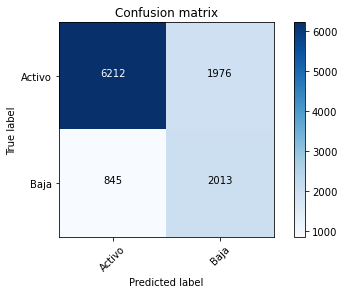

In [63]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 0, max_iter=1000, class_weight="balanced")
LR.fit(X_train,y_train) 
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_LR = cross_val_score(LR, X_test, y_test, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_LR)

y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.80


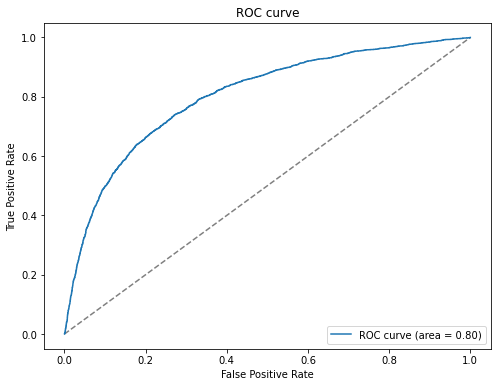

In [64]:
plot_roc_curve(LR, X_test, y_test)

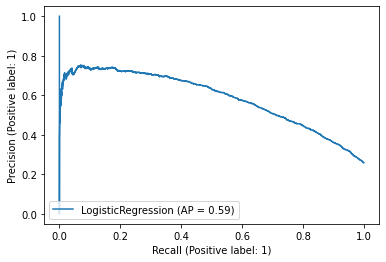

In [65]:
plot_precision_recall_curve(LR, X_test, y_test);

### KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# Don´t do this!!!

skf = StratifiedKFold(n_splits=5)
knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid = {'n_neighbors':np.arange(3,17,2)},
                      scoring = 'recall', cv = skf)

knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15])},
             scoring='recall')

In [70]:
knn.best_params_

{'n_neighbors': 3}

In [67]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      8188
           1       0.54      0.37      0.44      2858

    accuracy                           0.76     11046
   macro avg       0.67      0.63      0.64     11046
weighted avg       0.73      0.76      0.74     11046



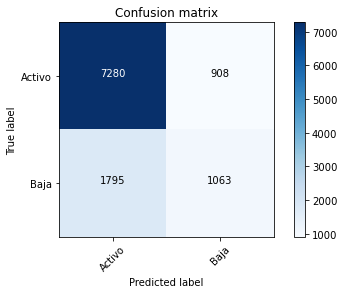

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.69


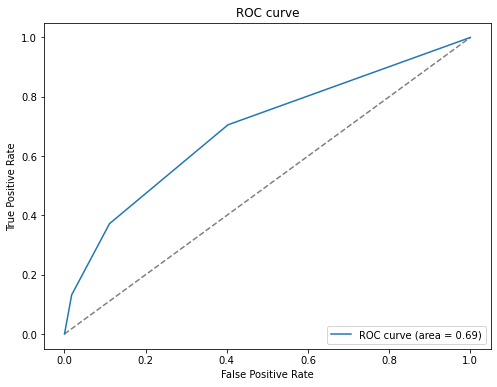

In [70]:
plot_roc_curve(knn, X_test, y_test)

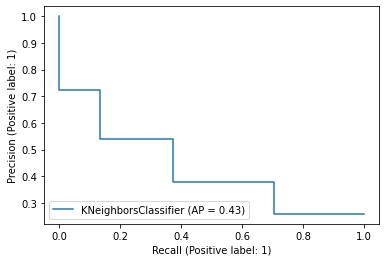

In [71]:
plot_precision_recall_curve(knn, X_test, y_test);

### Decission Tree Classifier

Decision Tree Accuracy is 0.73
Cross Validation Score = 0.72
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      8188
           1       0.49      0.72      0.58      2858

    accuracy                           0.73     11046
   macro avg       0.69      0.73      0.69     11046
weighted avg       0.78      0.73      0.75     11046



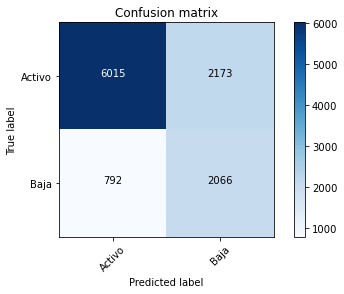

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

DT = DecisionTreeClassifier(random_state = 0,class_weight="balanced", min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_DT = cross_val_score(DT, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_DT)

y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.80


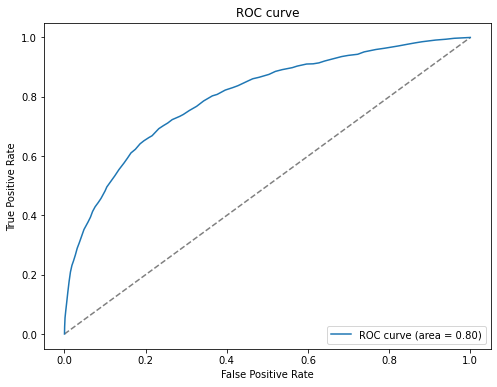

In [73]:
plot_roc_curve(DT, X_test, y_test)

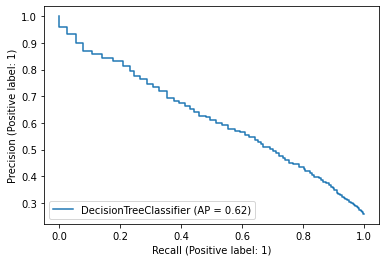

In [74]:
plot_precision_recall_curve(DT, X_test, y_test);

### Random Forest Classifier

Random Forest Accuracy is 0.81
Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      8188
           1       0.63      0.64      0.63      2858

    accuracy                           0.81     11046
   macro avg       0.75      0.75      0.75     11046
weighted avg       0.81      0.81      0.81     11046



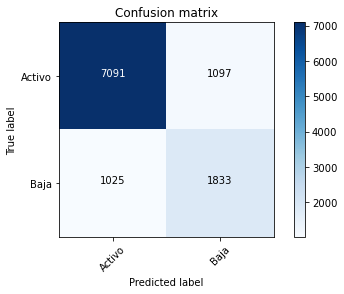

In [75]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))

skf = StratifiedKFold(n_splits=20)
score_rfc = cross_val_score(rfc, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_rfc)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.84


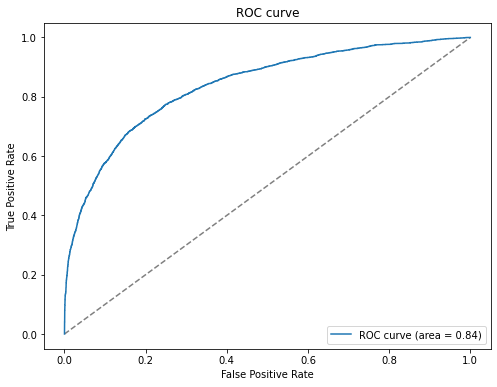

In [76]:
plot_roc_curve(rfc, X_test, y_test)

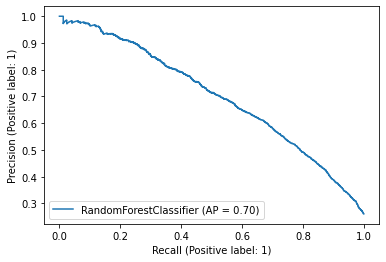

In [77]:
plot_precision_recall_curve(rfc, X_test, y_test);

### XGBoost

GradientBoost Accuracy= 0.83
Cross Validation Score = 0.83
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      8188
           1       0.78      0.50      0.61      2858

    accuracy                           0.83     11046
   macro avg       0.81      0.73      0.75     11046
weighted avg       0.83      0.83      0.82     11046



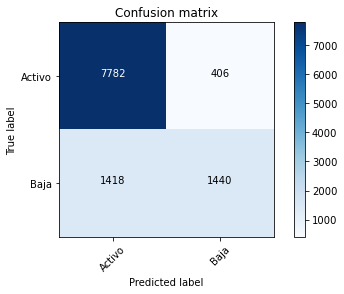

In [78]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, booster='gbtree', learning_rate=0.01, objective='binary:logistic')
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print ("GradientBoost Accuracy= %2.2f" % accuracy_score(y_test, y_pred))

skf = StratifiedKFold(n_splits=5)
score_xgb = cross_val_score(xgb, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_xgb)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.86


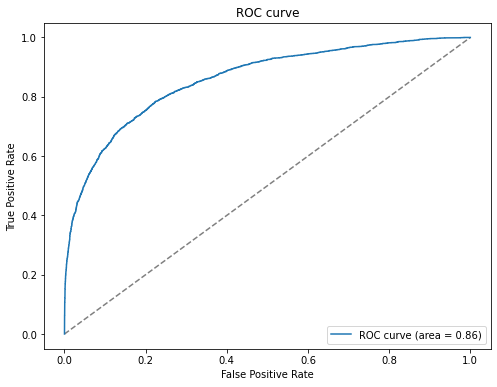

In [79]:
plot_roc_curve(xgb, X_test, y_test)

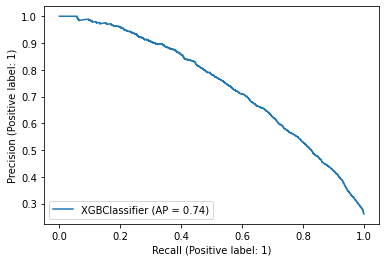

In [80]:
plot_precision_recall_curve(xgb, X_test, y_test);

### Comparing ROC Curves

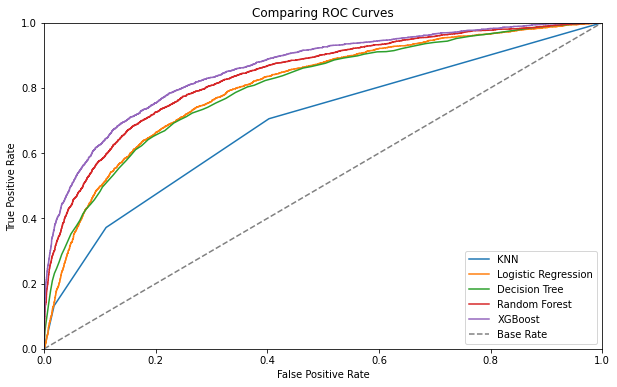

In [81]:
plt.figure(figsize = (10,6), linewidth= 1)

knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])

plt.plot(knn_fpr, knn_tpr, label='KNN' )
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression')
plt.plot(DT_fpr, DT_tpr, label='Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')

plt.plot([0,1],[0,1],label='Base Rate', ls = '--', c = 'grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Comparing ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Comparing PR Curves

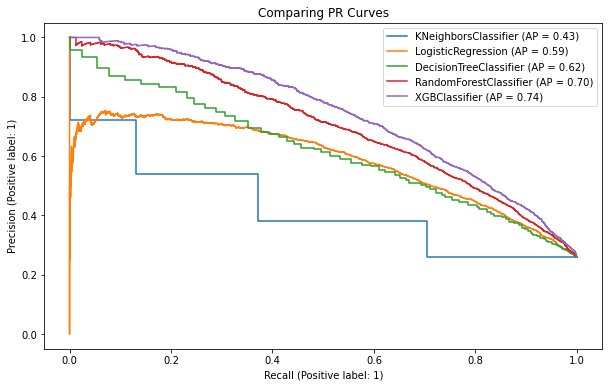

In [82]:
models = [knn, LR, DT, rfc, xgb]

fig, ax = plt.subplots(figsize=(10, 6))
for m in models:
    plot_precision_recall_curve(m, X_test, y_test, ax=ax)
    plt.legend(loc="upper right")
ax.set_title("Comparing PR Curves");

### Feature importances

In [83]:
from sklearn.feature_selection import RFE

# Using Recursive Feature Elimination Function and fitting it in a Logistic Regression Model
modell = LogisticRegression(max_iter=1000, class_weight="balanced")
rfe = RFE(modell, 5)
rfe = rfe.fit(X_train,y_train)
# Displays the feature rank
rfe.ranking_

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([ 1,  1,  1, 62, 53, 32, 59,  8,  7, 18, 20,  1, 19, 51,  1, 21,  9,
       28, 57, 22, 39, 11, 58, 50, 24, 54, 55, 23, 34, 35, 45, 16,  6, 37,
       56,  5, 40, 12, 10, 13, 52, 36, 30, 48, 33, 61, 49, 46, 38, 27, 47,
       17, 14, 15,  2, 29,  3,  4, 42, 41, 31, 26, 44, 25, 60, 43])

[1.91122483e-01 7.48476313e-02 9.14749787e-02 1.70735344e-02
 1.70661654e-02 1.47011133e-02 1.06498337e-02 1.27861299e-02
 2.07067309e-03 2.55947628e-03 1.20379135e-02 1.79448029e-03
 4.44172736e-03 1.62477720e-02 4.53748203e-03 8.15031563e-03
 1.58945273e-03 1.67592392e-03 1.36339828e-02 1.31113791e-02
 4.07017993e-03 5.76875179e-03 1.19329094e-03 1.73521424e-02
 1.34083530e-02 1.79467525e-02 5.61132474e-04 1.62202702e-04
 2.00015799e-03 1.39759121e-02 3.19173891e-03 8.64743279e-04
 3.87354506e-03 3.05232090e-03 1.18145531e-02 1.79968403e-04
 3.41318718e-03 9.55231789e-03 1.67845691e-02 1.40829560e-02
 1.31869101e-02 1.23011318e-02 6.61896251e-03 7.91256688e-03
 1.74740640e-02 2.40674056e-02 2.00398363e-02 1.35898584e-02
 1.85283180e-02 1.71151721e-02 1.86937668e-02 1.35674557e-02
 8.25543494e-03 4.80927883e-03 1.73905791e-02 1.26961914e-02
 1.29889677e-02 1.72217995e-02 8.56991963e-03 6.27892393e-03
 2.06307848e-02 2.06369558e-02 5.40879627e-03 2.02191527e-02
 4.01560097e-03 2.960941

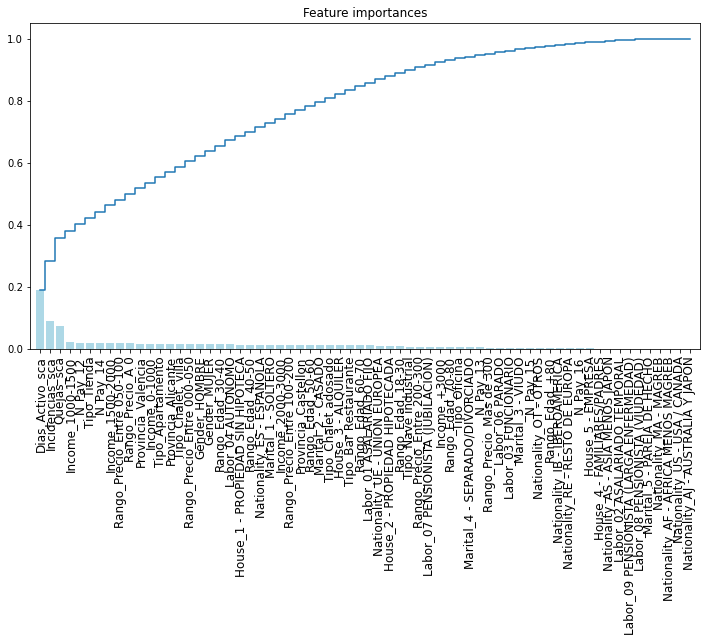

In [84]:
from sklearn.ensemble import ExtraTreesClassifier

# Using ExtraTreesClassifier model function
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = dummy_df.drop(['Status'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=12)
plt.xlim([-1, len(indices)])
plt.show()